# KNN Algorithm

## KNN Dataset

Algorithm for prediciting what classification a point on a scatter graph will be based on its nearest neighbours. 

In [1]:
import os

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

(120, 4)
[5.1 2.5 3.  1.1]
(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


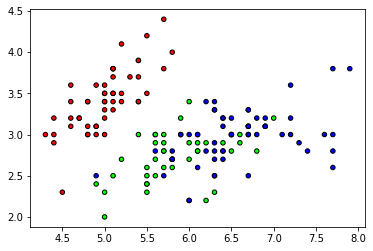

In [25]:
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_train[0])

print(y_train.shape)
print(y_train)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

## KNN Program

In [28]:
from collections import Counter

In [37]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels =  [self._predict(x) for x in X]
        
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest samples and labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # find most common label
        most_common = Counter(k_nearest_labels).most_common(1)
        
        return most_common[0][0]
        

In [54]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  np.sum(predictions==y_test) / len(y_test)

# Linear Regression

Algorithm for predicting the gradient and intercept of best fit line.

## LR Dataset

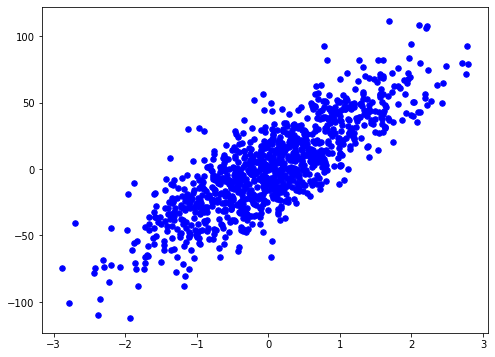

In [8]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

# print(X_train.shape)
# print(y_train.shape)

## LR Program

In [196]:
class LinearRegression:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        #initial parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        
        return (y_approximated)

383.24856330508425


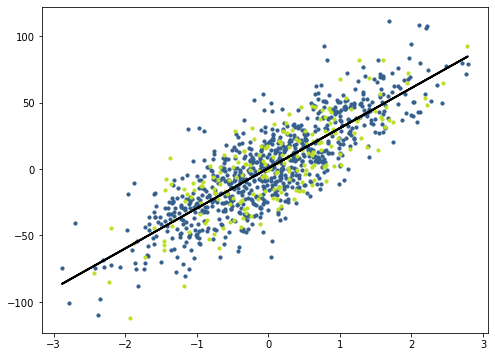

In [204]:
regressor = LinearRegression(0.001, 10000)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

mse_value = mse(y_test, predicted)
print(mse_value)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.3), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.9), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

## Logistic Regression

## LR Database

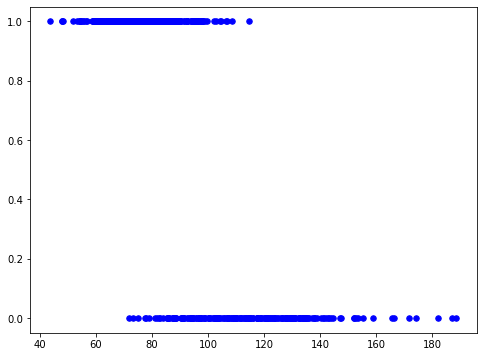

In [17]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 2], y, color="b", marker="o", s=30)
plt.show()

## LR Program

In [218]:
class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initial parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        
        return y_predicted_cls

In [221]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return accuracy

regressor = LogisticRegression(0.0001, 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088


# Regression Refactoring

Combines above algorithms into one class with subclasses.

In [23]:
class BaseRegression():
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        #initial parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            

    
    def approximation(self, X):
        return (self._approximation(X, self.weights, self.bias))

    def _approximation(self, X, w, b):
        raise NotImplementedError()
   
    def predict(self, X):
        return self._predict(X, self.weights, self.bias)
    
    def _predict(self, X, w, b):
        raise NotImplementedError()
        
class LinearRegression(BaseRegression):
    
    def _approximation(self, X, w, b): 
        return np.dot(X, w) + b

    def _predict(self, X, w, b):    
        return np.dot(X, w) + b

class LogisticRegression(BaseRegression):

    def _approximation(self, X, w, b):
        linear_model = np.dot(X, w) + bs
        return self._sigmoid(linear_model)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _predict(self, X, w, b):
        linear_model = np.dot(X, w) + b
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [22]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return accuracy

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

regressor = LogisticRegression(0.0001, 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

print(mse(y_test, predictions))


LR classification accuracy: 0.3684210526315789
0.631578947368421


<ipython-input-21-172ac9bbfff8>:21: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw
